# Learning the fundamentals of pandas
#### Author: Alphonse Brandon


In [3]:
# Importing libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4>Creating Objects in pandas


Creating a series and passing a list of values

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.241879,0.759868,-0.890722,0.620202
2013-01-02,0.145822,0.513743,-0.628044,0.159255
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438
2013-01-04,-0.070470,1.574316,-2.608989,-1.812740
2013-01-05,-1.513000,1.700117,1.897296,1.648903
2013-01-06,0.754513,-0.582074,0.681169,0.695610


Creating a DataFrame and passing a dict of objects that can be converted into series like

In [7]:
df2 = pd.DataFrame({
    'A': 1,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype = 'float32'),
    'D': np.array([3]* 4, dtype = 'int32'),
    'E': pd.Categorical(['test', 'train', 'test', 'train']),
    'F': 'foo'
    
})

df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


Creating specific data types for each column of the dataframe

In [8]:
# displaying the current data type

df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing Data

Seeing the top and bottom of the frame

In [15]:
df.head(2)

,A,B,C,D
2013-01-01,-0.241879,0.759868,-0.890722,0.620202
2013-01-02,0.145822,0.513743,-0.628044,0.159255


In [16]:
df.tail(2)

,A,B,C,D
2013-01-05,-1.513000,1.700117,1.897296,1.648903
2013-01-06,0.754513,-0.582074,0.681169,0.695610


Displaying the index, columns and uderlying numpy array

In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values

array([[-0.241879  ,  0.75986765, -0.89072198,  0.62020239],
       [ 0.14582237,  0.51374285, -0.62804437,  0.15925495],
       [ 2.16232875, -0.09918239, -0.24950794, -1.26843839],
       [-0.07047014,  1.5743156 , -2.60898932, -1.81273986],
       [-1.51300012,  1.70011715,  1.89729598,  1.64890344],
       [ 0.75451321, -0.58207398,  0.68116917,  0.69560976]])

Describe() shows a brief statistical summary of the dataframe

In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.206219,0.644464,-0.299800,0.007132
std,1.213565,0.901869,1.521930,1.304410
min,-1.513000,-0.582074,-2.608989,-1.812740
25%,-0.199027,0.054049,-0.825053,-0.911515
50%,0.037676,0.636805,-0.438776,0.389729
75%,0.602341,1.370704,0.448500,0.676758
max,2.162329,1.700117,1.897296,1.648903


Transposing the data

In [22]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.241879,0.145822,2.162329,-0.070470,-1.513000,0.754513
B,0.759868,0.513743,-0.099182,1.574316,1.700117,-0.582074
C,-0.890722,-0.628044,-0.249508,-2.608989,1.897296,0.681169
D,0.620202,0.159255,-1.268438,-1.812740,1.648903,0.695610


Sorting my data by an axis

In [23]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-06,0.754513,-0.582074,0.681169,0.695610
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438
2013-01-02,0.145822,0.513743,-0.628044,0.159255
2013-01-01,-0.241879,0.759868,-0.890722,0.620202
2013-01-04,-0.070470,1.574316,-2.608989,-1.812740
2013-01-05,-1.513000,1.700117,1.897296,1.648903


Selecting and Getting data

In [24]:
df['A']

2013-01-01   -0.241879
2013-01-02    0.145822
2013-01-03    2.162329
2013-01-04   -0.070470
2013-01-05   -1.513000
2013-01-06    0.754513
Freq: D, Name: A, dtype: float64

Selecting a range of rows

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,-0.241879,0.759868,-0.890722,0.620202
2013-01-02,0.145822,0.513743,-0.628044,0.159255
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438


In [26]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.145822,0.513743,-0.628044,0.159255
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438
2013-01-04,-0.070470,1.574316,-2.608989,-1.812740


Selection by label

In [28]:
df.loc[[dates[0]]]

,A,B,C,D
2013-01-01,-0.241879,0.759868,-0.890722,0.620202


In [29]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.241879,0.759868
2013-01-02,0.145822,0.513743
2013-01-03,2.162329,-0.099182
2013-01-04,-0.070470,1.574316
2013-01-05,-1.513000,1.700117
2013-01-06,0.754513,-0.582074


Label slicing

In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.145822,0.513743
2013-01-03,2.162329,-0.099182
2013-01-04,-0.070470,1.574316


Reduction in the dimension of returned objects

In [33]:
df.loc['20130102', ['A', 'B']]

A    0.145822
B    0.513743
Name: 2013-01-02 00:00:00, dtype: float64

Getting a specific value

In [35]:
df.loc[dates[0], 'A']

-0.2418790034500852

A faster method to getting a specific value

In [36]:
df.at[dates[0], 'A']

-0.2418790034500852

Selection by position

In [37]:
df.iloc[3]

A   -0.070470
B    1.574316
C   -2.608989
D   -1.812740
Name: 2013-01-04 00:00:00, dtype: float64

Performing integer slicing

In [38]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.07047,1.574316
2013-01-05,-1.51300,1.700117


Selecting a list of integer position locations

In [39]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.145822,-0.628044
2013-01-03,2.162329,-0.249508
2013-01-05,-1.513000,1.897296


Slicing rows explicitly

In [40]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.145822,0.513743,-0.628044,0.159255
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438


Slicing columns explicitly

In [41]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.759868,-0.890722
2013-01-02,0.513743,-0.628044
2013-01-03,-0.099182,-0.249508
2013-01-04,1.574316,-2.608989
2013-01-05,1.700117,1.897296
2013-01-06,-0.582074,0.681169


Getting an explicit value

In [42]:
df.iloc[2,2]

-0.2495079405106601

An equip to the above method is 

In [43]:
df.iat[2,2]

-0.2495079405106601

<h4>Boolean Indexing

Using a single columns value to select data

In [44]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.145822,0.513743,-0.628044,0.159255
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438
2013-01-06,0.754513,-0.582074,0.681169,0.695610


A 'Where' operation for getting

In [46]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.759868,NaN,0.620202
2013-01-02,0.145822,0.513743,NaN,0.159255
2013-01-03,2.162329,NaN,NaN,NaN
2013-01-04,NaN,1.574316,NaN,NaN
2013-01-05,NaN,1.700117,1.897296,1.648903
2013-01-06,0.754513,NaN,0.681169,0.695610


Filetering through the 'isin' method

In [47]:
df2 = df.copy()

df2['E'] = ['One','One', 'Two', 'Three', 'Four', 'Three']

df2

,A,B,C,D,E
2013-01-01,-0.241879,0.759868,-0.890722,0.620202,One
2013-01-02,0.145822,0.513743,-0.628044,0.159255,One
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438,Two
2013-01-04,-0.070470,1.574316,-2.608989,-1.812740,Three
2013-01-05,-1.513000,1.700117,1.897296,1.648903,Four
2013-01-06,0.754513,-0.582074,0.681169,0.695610,Three


In [48]:
df2[df2['E'].isin(['Two', 'Four'])]

,A,B,C,D,E
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438,Two
2013-01-05,-1.513000,1.700117,1.897296,1.648903,Four


<h4> Setting

Automatically align the data through the indexes by setting a new column

In [52]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

df['F'] = s1

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting value by labels

In [57]:
df.at[dates[0], 'A'] = 0

df.iat[0,1] = 0

df



,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.890722,0.620202,NaN
2013-01-02,0.145822,0.513743,-0.628044,0.159255,1.0
2013-01-03,2.162329,-0.099182,-0.249508,-1.268438,2.0
2013-01-04,-0.070470,1.574316,-2.608989,-1.812740,3.0
2013-01-05,-1.513000,1.700117,1.897296,1.648903,4.0
2013-01-06,0.754513,-0.582074,0.681169,0.695610,5.0


Setting by assigning with a numpy array

In [59]:
df.loc[:, 'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.890722,5,NaN
2013-01-02,0.145822,0.513743,-0.628044,5,1.0
2013-01-03,2.162329,-0.099182,-0.249508,5,2.0
2013-01-04,-0.070470,1.574316,-2.608989,5,3.0
2013-01-05,-1.513000,1.700117,1.897296,5,4.0
2013-01-06,0.754513,-0.582074,0.681169,5,5.0


Using the where operator with setting

In [61]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.890722,-5,NaN
2013-01-02,-0.145822,-0.513743,-0.628044,-5,-1.0
2013-01-03,-2.162329,-0.099182,-0.249508,-5,-2.0
2013-01-04,-0.070470,-1.574316,-2.608989,-5,-3.0
2013-01-05,-1.513000,-1.700117,-1.897296,-5,-4.0
2013-01-06,-0.754513,-0.582074,-0.681169,-5,-5.0


### Missing Data

Changing the index of a specific index through reindexing

In [63]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.890722,5,NaN,NaN
2013-01-02,0.145822,0.513743,-0.628044,5,1.0,NaN
2013-01-03,2.162329,-0.099182,-0.249508,5,2.0,NaN
2013-01-04,-0.070470,1.574316,-2.608989,5,3.0,NaN


In [64]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.890722,5,NaN,1.0
2013-01-02,0.145822,0.513743,-0.628044,5,1.0,1.0
2013-01-03,2.162329,-0.099182,-0.249508,5,2.0,NaN
2013-01-04,-0.070470,1.574316,-2.608989,5,3.0,NaN


Dropping any rows with missing values

In [65]:
df1.dropna(how= 'any')

,A,B,C,D,F,E
2013-01-02,0.145822,0.513743,-0.628044,5,1.0,1.0


Filling missing values

In [67]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.890722,5,5.0,1.0
2013-01-02,0.145822,0.513743,-0.628044,5,1.0,1.0
2013-01-03,2.162329,-0.099182,-0.249508,5,2.0,5.0
2013-01-04,-0.070470,1.574316,-2.608989,5,3.0,5.0


Getting boolean mask where values are nan

In [68]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Performing Operations

#### Stats


Operations generally will exclude missing data

Performing descriptive statistics on column axis is the default

In [69]:
df.mean()

A    0.246532
B    0.517820
C   -0.299800
D    5.000000
F    3.000000
dtype: float64

Same operation on the row axis

In [70]:
df.mean(1)

2013-01-01    1.027320
2013-01-02    1.206304
2013-01-03    1.762728
2013-01-04    1.378971
2013-01-05    2.216883
2013-01-06    2.170722
Freq: D, dtype: float64

Objects that have different dimensions and needs alignment

In [71]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [72]:
s.shift(2)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [73]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,-1.000000,-1.000000,-1.890722,4.0,NaN
2013-01-02,-2.854178,-2.486257,-3.628044,2.0,-2.0
2013-01-03,-2.837671,-5.099182,-5.249508,0.0,-3.0
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,-7.513000,-4.299883,-4.102704,-1.0,-2.0
2013-01-06,-7.245487,-8.582074,-7.318831,-3.0,-3.0


### Using 'apply' to apply functions to data

In [74]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.890722,5,NaN
2013-01-02,0.145822,0.513743,-0.628044,5,1.0
2013-01-03,2.162329,-0.099182,-0.249508,5,2.0
2013-01-04,-0.070470,1.574316,-2.608989,5,3.0
2013-01-05,-1.513000,1.700117,1.897296,5,4.0
2013-01-06,0.754513,-0.582074,0.681169,5,5.0


In [75]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.890722,5,NaN
2013-01-02,0.145822,0.513743,-1.518766,10,1.0
2013-01-03,2.308151,0.414560,-1.768274,15,3.0
2013-01-04,2.237681,1.988876,-4.377264,20,6.0
2013-01-05,0.724681,3.688993,-2.479968,25,10.0
2013-01-06,1.479194,3.106919,-1.798798,30,15.0


In [76]:
df.apply(lambda x: x.max() - x.min())

A    3.675329
B    2.282191
C    4.506285
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [77]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    5
2    1
3    2
4    3
5    6
6    5
7    2
8    3
9    5
dtype: int32

Counting the number of unique values generated

In [79]:
s.value_counts()

5    3
2    2
3    2
0    1
1    1
6    1
dtype: int64

## String Methods

In [80]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'cat', 'dog'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6     cat
7     dog
dtype: object

In [82]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6     cat
7     dog
dtype: object

In [83]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6     CAT
7     DOG
dtype: object

### Merge


Concating pandas objects together with concat()

In [87]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.317200,0.128960,-1.368869,-0.229732
1,-0.095899,-1.359435,0.596714,0.390043
2,1.380096,0.814861,0.254791,1.093902
3,-0.145858,-0.314265,0.893472,0.198008
4,0.267005,-0.750195,0.868578,1.452353
5,-0.922083,-0.221253,-0.090456,-0.634874
6,1.682449,0.147653,-1.868266,0.203193
7,-0.289608,0.308727,-1.676063,-1.011925
8,0.061073,1.750247,0.088301,-0.664556
9,1.227991,0.801910,0.812155,-0.189859


Breaking the dataframe generated into pieces

In [88]:
pieces = [df[:3], df[3:7], df[7:]]

pieces

[          0         1         2         3
 0  0.317200  0.128960 -1.368869 -0.229732
 1 -0.095899 -1.359435  0.596714  0.390043
 2  1.380096  0.814861  0.254791  1.093902,
           0         1         2         3
 3 -0.145858 -0.314265  0.893472  0.198008
 4  0.267005 -0.750195  0.868578  1.452353
 5 -0.922083 -0.221253 -0.090456 -0.634874
 6  1.682449  0.147653 -1.868266  0.203193,
           0         1         2         3
 7 -0.289608  0.308727 -1.676063 -1.011925
 8  0.061073  1.750247  0.088301 -0.664556
 9  1.227991  0.801910  0.812155 -0.189859]

Rejoining the pieces through concat()

In [89]:
pd.concat(pieces)

,0,1,2,3
0,0.317200,0.128960,-1.368869,-0.229732
1,-0.095899,-1.359435,0.596714,0.390043
2,1.380096,0.814861,0.254791,1.093902
3,-0.145858,-0.314265,0.893472,0.198008
4,0.267005,-0.750195,0.868578,1.452353
5,-0.922083,-0.221253,-0.090456,-0.634874
6,1.682449,0.147653,-1.868266,0.203193
7,-0.289608,0.308727,-1.676063,-1.011925
8,0.061073,1.750247,0.088301,-0.664556
9,1.227991,0.801910,0.812155,-0.189859


#### Join

In [91]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

left


,key,lval
0,foo,1
1,foo,2


In [92]:
right

,key,rval
0,foo,4
1,foo,5


In [93]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Appending rows to a dataframe

In [94]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,-0.159033,-0.927777,-0.331350,-1.061021
1,0.136640,-1.017489,0.499721,0.785204
2,-0.090647,0.891062,-0.151616,-0.582810
3,-2.770883,0.205734,-0.519390,0.649394
4,-1.852825,-0.238560,-0.148549,-0.327776
5,0.633367,-0.164512,-1.206361,-0.238539
6,0.203767,0.861847,-1.093475,-1.758947
7,-0.967613,-0.019111,0.524440,-0.642317


In [95]:
s = df.iloc[3]
s

A   -2.770883
B    0.205734
C   -0.519390
D    0.649394
Name: 3, dtype: float64

### Grouping

In [96]:
df = pd.DataFrame({
'A' : ['foo', 'bar', 'foo', 'bar',
 'foo', 'bar', 'foo', 'foo'],
 'B' : ['one', 'one', 'two', 'three',
 'two', 'two', 'one', 'three'],
 'C' : np.random.randn(8),
 'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.869770,0.625602
1,bar,one,2.081513,0.379312
2,foo,two,0.064168,-0.328909
3,bar,three,1.702918,-0.847773
4,foo,two,-0.738157,-2.314752
5,bar,two,-0.022660,-0.420843
6,foo,one,-0.507123,0.396457
7,foo,three,0.843972,0.526819


grouping and then applying a sum function

In [99]:
df.groupby('A').sum()


,C,D
A,,
bar,3.761771,-0.889304
foo,0.532631,-1.094783


Grouping by multiple columns forms a hierachical index

In [101]:
df.groupby(['B', 'A']).sum()

C         D
B     A                      
one   bar  2.081513  0.379312
      foo  0.362648  1.022059
three bar  1.702918 -0.847773
      foo  0.843972  0.526819
two   bar -0.022660 -0.420843
      foo -0.673989 -2.643660

## Stack

In [102]:
turples = list(zip(*[
    ['bar', 'bar', 'baz', 'baz',
    'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two',
    'one', 'two', 'one', 'two']
]))

turples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [103]:
index = pd.MultiIndex.from_tuples(turples, names = ['first', 'second'] )
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [104]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.834421 -0.274385
      two     0.522074 -1.396337
baz   one    -0.467145  0.455713
      two     0.438970  0.754131
foo   one    -1.825839  0.093608
      two     0.205666  0.284681
qux   one     0.040018 -0.867789
      two    -0.556253 -1.067454

In [105]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.834421 -0.274385
      two     0.522074 -1.396337
baz   one    -0.467145  0.455713
      two     0.438970  0.754131

stack() method compresses a level in the dataframe's columns

In [108]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.834421
               B   -0.274385
       two     A    0.522074
               B   -1.396337
baz    one     A   -0.467145
               B    0.455713
       two     A    0.438970
               B    0.754131
dtype: float64

The inverse of stack is unstack() which unstacks the last level 

In [109]:
stacked.unstack()

A         B
first second                    
bar   one     0.834421 -0.274385
      two     0.522074 -1.396337
baz   one    -0.467145  0.455713
      two     0.438970  0.754131

In [110]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.834421 -0.467145
       B -0.274385  0.455713
two    A  0.522074  0.438970
       B -1.396337  0.754131

Pivot Tables


In [111]:
df = pd.DataFrame({
    'A' : ['one', 'one', 'two', 'three'] * 3,
    'B' : ['A', 'B', 'C'] * 4,
    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D' : np.random.randn(12),
    'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.908353,0.080216
1,one,B,foo,0.803728,-0.475875
2,two,C,foo,0.006195,-0.447192
3,three,A,bar,-2.125928,1.024531
4,one,B,bar,0.373091,0.265808
5,one,C,bar,1.848654,-0.711367
6,two,A,foo,0.324832,0.171283
7,three,B,foo,-1.091986,0.676784
8,one,C,foo,-0.108718,1.822491
9,one,A,bar,-0.352797,0.908468


Pivoting the data in the table

In [112]:
pd.pivot_table(df, values='D', index = ['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.352797  0.908353
      B  0.373091  0.803728
      C  1.848654 -0.108718
three A -2.125928       NaN
      B       NaN -1.091986
      C -0.020033       NaN
two   A       NaN  0.324832
      B  1.448865       NaN
      C       NaN  0.006195

### Time Series

In [113]:
rng = pd.date_range('1/1/2012', periods = 100, freq = 'S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [115]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index= rng)
ts

2012-01-01 00:00:00    239
2012-01-01 00:00:01     27
2012-01-01 00:00:02    288
2012-01-01 00:00:03    167
2012-01-01 00:00:04    295
                      ... 
2012-01-01 00:01:35    461
2012-01-01 00:01:36    171
2012-01-01 00:01:37    482
2012-01-01 00:01:38      2
2012-01-01 00:01:39    101
Freq: S, Length: 100, dtype: int32

In [117]:
ts.resample('5Min').sum()

2012-01-01    24208
Freq: 5T, dtype: int32

Time zone representation

In [119]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.432972
2012-03-07   -0.275406
2012-03-08    0.562814
2012-03-09    0.245252
2012-03-10    1.110808
Freq: D, dtype: float64

In [122]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00   -0.432972
2012-03-07 00:00:00+00:00   -0.275406
2012-03-08 00:00:00+00:00    0.562814
2012-03-09 00:00:00+00:00    0.245252
2012-03-10 00:00:00+00:00    1.110808
Freq: D, dtype: float64

Converting to another timezone

In [123]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.432972
2012-03-06 19:00:00-05:00   -0.275406
2012-03-07 19:00:00-05:00    0.562814
2012-03-08 19:00:00-05:00    0.245252
2012-03-09 19:00:00-05:00    1.110808
Freq: D, dtype: float64

Converting bewtween time span representations

In [124]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.352058
2012-02-29   -0.215977
2012-03-31   -1.328942
2012-04-30    1.550945
2012-05-31   -0.423809
Freq: M, dtype: float64

In [125]:
ps = ts.to_period()
ps

2012-01   -0.352058
2012-02   -0.215977
2012-03   -1.328942
2012-04    1.550945
2012-05   -0.423809
Freq: M, dtype: float64

In [126]:
ps.to_timestamp()

2012-01-01   -0.352058
2012-02-01   -0.215977
2012-03-01   -1.328942
2012-04-01    1.550945
2012-05-01   -0.423809
Freq: MS, dtype: float64

In [127]:
prng = pd.period_range('1990Q1', '2000Q4', freq = 'Q-Nov')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 'S') + 9

ts.head()

1990-03-01 09:00   -1.181987
1990-06-01 09:00   -1.890002
1990-09-01 09:00    0.398525
1990-12-01 09:00   -0.549341
1991-03-01 09:00   -0.202449
Freq: H, dtype: float64

### Categoricals

In [128]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting raw grade to cathegorical data typy

In [129]:
df['grade'] = df['raw_grade'].astype("category")

df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [130]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Renaming categories to more meaningful names

In [131]:
df["grade"].cat.categories = ['very good', 'good', 'very bad']

df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder categories and simultaneously adding missing values

In [134]:
df["grade"] = df["grade"].cat.set_categories(['very bad', 'bad', 'meduim', 'good', 'very good'])

df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'meduim', 'good', 'very good']

Sorting in categories is per order as seen in the code snippet bellow

In [135]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by categorical columns

In [136]:
df.groupby('grade').size()

grade
very bad     1
bad          0
meduim       0
good         2
very good    3
dtype: int64

### Plotting

<AxesSubplot:>

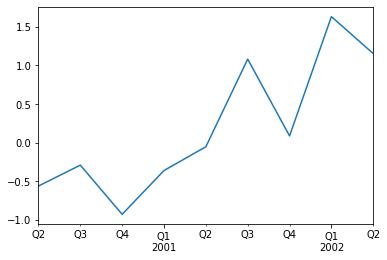

In [155]:
ts = pd.Series(np.random.randn(9), index = pd.date_range('1/1/2000', periods=9, freq='Q-Jul'))

ts = ts.cumsum()

ts.plot()

Ploting columns with lables

<Figure size 432x288 with 0 Axes>

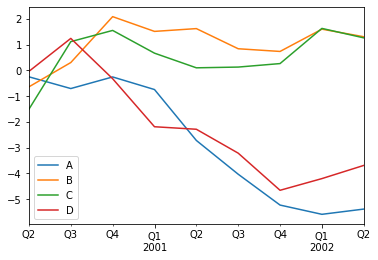

In [167]:
df = pd.DataFrame(np.random.randn(9, 4), index = ts.index, columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc = 'best')

### Getting data In/Out

#### CSV

Writing to a CSV

In [168]:
df.to_csv('foo.csv')

Reading Data from csv

In [169]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-31,-0.252752,-0.641057,-1.508960,-0.039971
1,2000-04-30,-0.707834,0.301912,1.113631,1.239253
2,2000-07-31,-0.257382,2.083869,1.548644,-0.326421
3,2000-10-31,-0.746695,1.511058,0.665801,-2.190746
4,2001-01-31,-2.723086,1.619535,0.097028,-2.288418
5,2001-04-30,-4.034255,0.837272,0.125933,-3.216494
6,2001-07-31,-5.231787,0.732669,0.261673,-4.658268
7,2001-10-31,-5.591006,1.597862,1.627280,-4.204255
8,2002-01-31,-5.387560,1.303933,1.260233,-3.692476


#### EXCEL

Reading and writing to MS Excel

In [170]:
df.to_excel('foo.xlsx', sheet_name= 'sheet1')

In [171]:
# reading the excel file

pd.read_excel('foo.xlsx', 'sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-31,-0.252752,-0.641057,-1.508960,-0.039971
1,2000-04-30,-0.707834,0.301912,1.113631,1.239253
2,2000-07-31,-0.257382,2.083869,1.548644,-0.326421
3,2000-10-31,-0.746695,1.511058,0.665801,-2.190746
4,2001-01-31,-2.723086,1.619535,0.097028,-2.288418
5,2001-04-30,-4.034255,0.837272,0.125933,-3.216494
6,2001-07-31,-5.231787,0.732669,0.261673,-4.658268
7,2001-10-31,-5.591006,1.597862,1.627280,-4.204255
8,2002-01-31,-5.387560,1.303933,1.260233,-3.692476
